### 2.3
#### 2.3.1
Using the features `['0', '1', '2']` and setting the number of clusters to `5` we get the following clustering by performing `our_k_means_standard` or `our_k_means_adv()` (i.e. k-means++), respectively.

For the exact implementations we refer to the `functions.py`-file.

Concerning "map-reduce":
-   The so-called "map" is done by `functions.my_map()`.
-   The so-called "reduce" is done by `functions.my_reduce()`.
For a better understanding we will execute them on the first 90 entries of the dataset.

In [1]:
import functions
import seaborn as sns

c:\Users\Daniel\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
k = 5
data_path = 'pca.csv'
essential_cols = ['0','1','2']
chunksize = 10**4
nrows = None

First, we run our standard version of k-means. For the illustration we use the first two columns since these are the most important found by PCA.

c:\Users\Daniel\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Daniel\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Daniel\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Daniel\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and w

<AxesSubplot:xlabel='0', ylabel='1'>

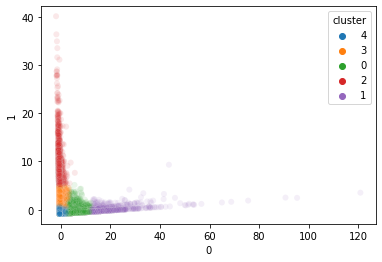

In [3]:
res = functions.our_k_means_standard(k, data_path, essential_cols, nrows=nrows, chunksize=chunksize, upper_bound_for_iterations=50 )
sns.scatterplot(data=res, x='0', y="1", hue="cluster", alpha=0.1)

Next, we run our ++version of k-means using the same columns for illustrations.

c:\Users\Daniel\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Daniel\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Daniel\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Daniel\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and w

<AxesSubplot:xlabel='0', ylabel='1'>

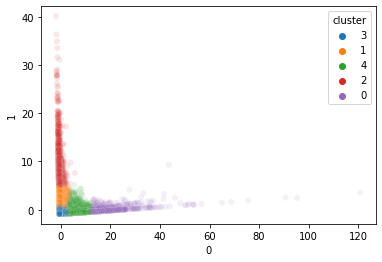

In [4]:
res_adv = functions.our_k_means_adv(k, data_path, essential_cols, nrows=nrows, chunksize=chunksize, upper_bound_for_iterations=50 )
sns.scatterplot(data=res_adv, x='0', y="1", hue="cluster", alpha=0.1)

To also illustrate how our map-reduce works, first let us have a look at the map-function. 
We processed the data chunkwise and each chunk independently from the others. Then we concatenated the results. The result of this concatenation is shown below. We can still recognize the chunking by looking at the index. Each processed chunk starts with a 0.

The columns 0, 1, 2 of this dataframe show the summed up values of each feature after grouping them by cluster inside a chunk.

In [5]:
nrows = 9
chunksize = 3
centers = functions.init_centers_adv(k, data_path, essential_cols, nrows=nrows)
map_res = functions.my_map(data_path, essential_cols, centers, chunksize, nrows)
map_res

,cluster,0,1,2,count
0,0,-1.085413,-1.753902,-0.019061,2
1,5,-0.694621,3.376937,-0.098711,1
0,4,-0.346285,-0.656928,-0.051830,1
1,5,-0.271540,0.373459,0.039834,1
2,6,-0.559195,-0.495045,-0.016357,1
0,0,-0.542707,-0.876951,-0.009531,1
1,6,-0.558273,-0.453741,-0.016773,1
2,8,3.305258,0.429662,0.534817,1


Next, we look at the reduce-function. It basically just performs a `groupby('cluster')` on the `map_res` given above, sums again the values for 0,1,2 columnwise and divides by count. The result of the reduce-function hence are the new centers for the next iteration inside our k-means-algorithms.

In [6]:
functions.my_reduce(map_res, essential_cols)

,0,1,2
0,-0.542707,-0.876951,-0.009531
1,-0.346285,-0.656928,-0.051830
2,-0.483080,1.875198,-0.029438
3,-0.558734,-0.474393,-0.016565
4,3.305258,0.429662,0.534817
